# Занятие 3. Тренды и сезонность во временных рядах
## Анализ структуры временного ряда и его компонентов
---
В этом занятии студенты изучат тренды, сезонность и остаточную компоненту временного ряда, а также научатся выполнять декомпозицию.
# Теоретическая справка: Тренд и сезонность во временных рядах

### Классическая модель временного ряда
y(t) = Тренд + Сезонность + Циклы + Остатки (шум)

1. Тренд (Trend)  
   Долгосрочное направление изменения: рост, спад, плато.  
   Примеры: увеличение населения, рост онлайн-продаж с 2015 года.

2. Сезонность (Seasonality)  
   Повторяющиеся колебания с фиксированным периодом:  
   - годовая (продажи мороженого летом)  
   - недельная (трафик сайта выше в будни)  
   - дневная (пики потребления электроэнергии утром и вечером)

3. Циклы (Cycles)  
   Длинные колебания без фиксированного периода (экономические циклы 7–10 лет).

4. Остатки (Residuals)  
   Случайный шум после удаления всех систематических компонент.

### Методы разложения
- Аддитивная модель (additive):  
  y(t) = Trend + Seasonal + Residual  
  → используется, когда амплитуда сезонности примерно постоянна.

- Мультипликативная модель (multiplicative):  
  y(t) = Trend × Seasonal × Residual  
  → когда амплитуда сезонности растёт вместе с трендом (классический пример — AirPassengers).

В Python: seasonal_decompose(data, model='additive'/'multiplicative', period=12)

Зачем это нужно?  
- Понимание структуры ряда  
- Удаление сезонности перед проверкой стационарности  
- Выбор подходящей модели прогнозирования (SARIMA, Prophet, Holt-Winters)

### 1. Загрузка данных
Используем погодные данные из прошлого занятия. При необходимости замените на свой датасет.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

url = 'https://raw.githubusercontent.com/graiustommy/-/refs/heads/main/data1.csv'
df = pd.read_csv(url, parse_dates=['Timestamp'], index_col='Timestamp')
df.head()

,Vibration_X,Vibration_Y,Vibration_Z,Temperature,RPM,Pressure,Power_Consumption,Oil_Level,Motor_Current
Timestamp,,,,,,,,,
2024-01-01 08:00:00,2.1,1.8,3.2,65.2,1450,8.2,45.3,85.1,23.4
2024-01-01 08:05:00,2.3,1.9,3.1,65.8,1452,8.1,45.1,85.0,23.2
2024-01-01 08:10:00,2.5,2.1,3.4,66.5,1448,8.3,45.8,84.9,23.7
2024-01-01 08:15:00,2.7,2.3,3.6,67.1,1451,8.2,46.2,84.8,24.1
2024-01-01 08:20:00,2.9,2.5,3.8,67.8,1453,8.4,46.5,84.7,24.3


### 2. Визуальный анализ временного ряда

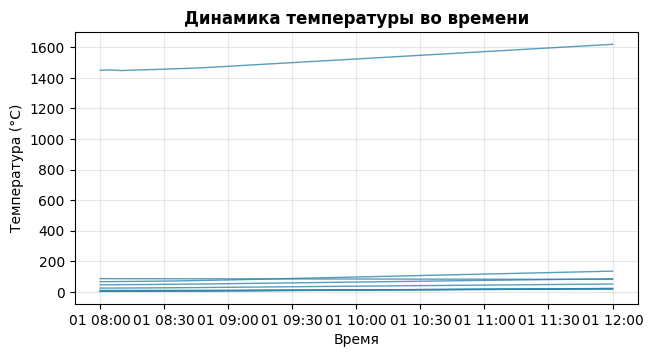

In [11]:
plt.figure(figsize=(16, 12))

# 1. Основной тренд
plt.subplot(3, 2, 1)
plt.plot(df.index, df.values, linewidth=1, color='#2E86AB', alpha=0.8)
plt.title('Динамика температуры во времени', fontsize=12, fontweight='bold')
plt.xlabel('Время')
plt.ylabel('Температура (°C)')
plt.grid(True, alpha=0.3)

### 3. Декомпозиция временного ряда
Разложим временной ряд на компоненты: тренд, сезонность, остаток.

Используемый период: 24


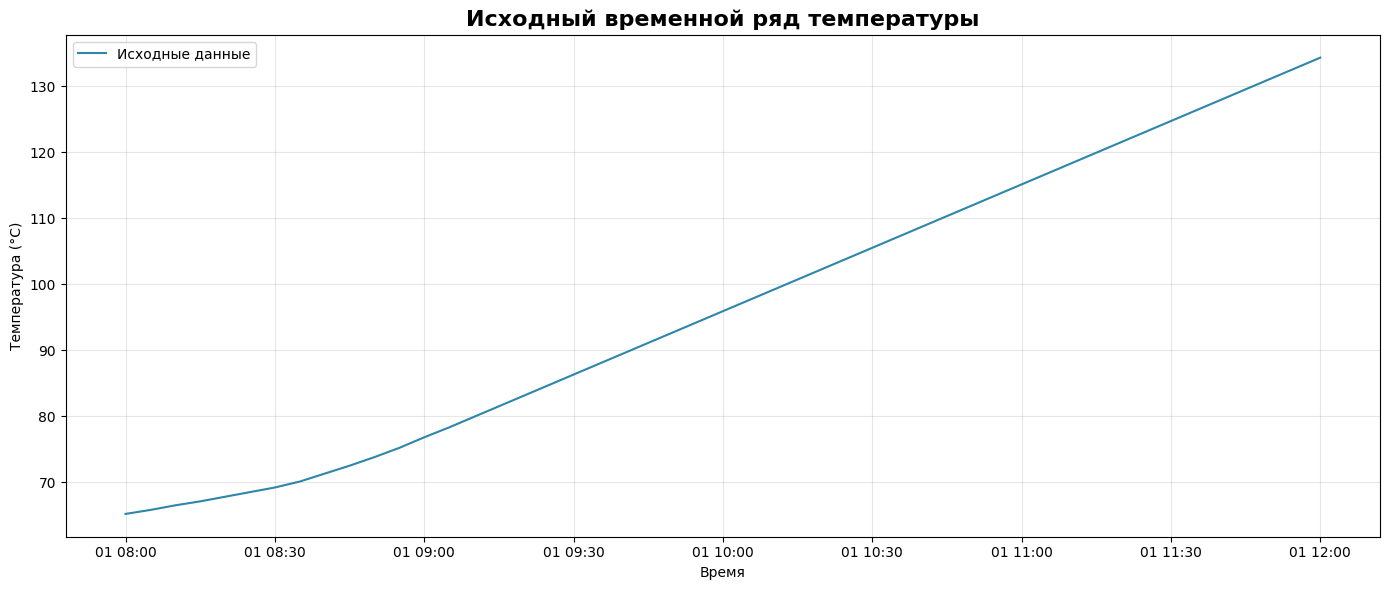

In [35]:
# 3. Декомпозиция временного ряда

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# Определяем период сезонности
if pd.infer_freq(df.index) in ['H', 'h']:
    period = 24  # суточная сезонность для почасовых данных
elif pd.infer_freq(df.index) in ['D', 'd']:
    period = 7   # недельная сезонность для ежедневных данных
else:
    period = min(365, len(df) // 2)

print(f"Используемый период: {period}")

# Выполняем декомпозицию
decomp = seasonal_decompose(df['Temperature'], model='additive', period=period)

# Один график с исходными данными
plt.figure(figsize=(14, 6))
plt.plot(decomp.observed, color='#2E86AB', linewidth=1.5, label='Исходные данные')
plt.title('Исходный временной ряд температуры', fontsize=16, fontweight='bold')
plt.xlabel('Время')
plt.ylabel('Температура (°C)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

### 4. Анализ тренда
Построим график тренда отдельно.

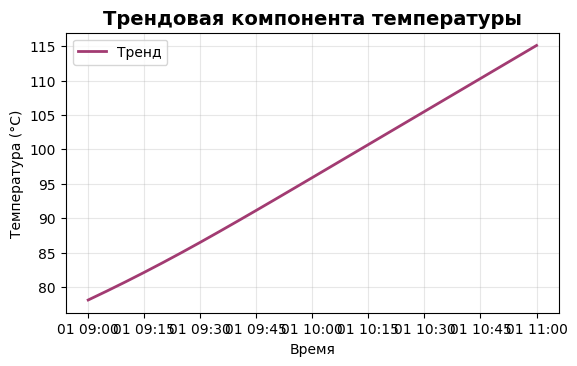

In [25]:
plt.figure(figsize=(14, 8))

# Основной график тренда
plt.subplot(2, 2, 1)
plt.plot(decomp.trend, color='#A23B72', linewidth=2, label='Тренд')
plt.title('Трендовая компонента температуры', fontsize=14, fontweight='bold')
plt.xlabel('Время')
plt.ylabel('Температура (°C)')
plt.grid(True, alpha=0.3)
plt.legend()

### 5. Анализ сезонности

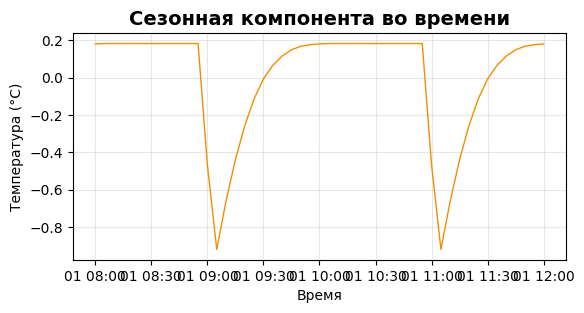

In [26]:
plt.figure(figsize=(14, 10))

# График сезонности во времени
plt.subplot(3, 2, 1)
plt.plot(decomp.seasonal, color='#F18F01', linewidth=1)
plt.title('Сезонная компонента во времени', fontsize=14, fontweight='bold')
plt.xlabel('Время')
plt.ylabel('Температура (°C)')
plt.grid(True, alpha=0.3)


### 6. Остаточная компонента


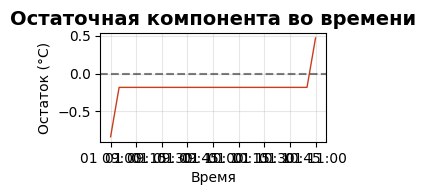

In [27]:
plt.subplot(3, 2, 1)
plt.plot(decomp.resid, color='#C73E1D', linewidth=1)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.title('Остаточная компонента во времени', fontsize=14, fontweight='bold')
plt.xlabel('Время')
plt.ylabel('Остаток (°C)')
plt.grid(True, alpha=0.3)

### 7. Проверка стационарности
Используем тест Дики-Фуллера.

In [30]:
from statsmodels.tsa.stattools import adfuller

print("1. ТЕСТ ДИКИ-ФУЛЛЕРА (ADF):")
adf_result = adfuller(df['Temperature'].dropna())
print(f"   ADF Statistic: {adf_result[0]:.6f}")
print(f"   p-value: {adf_result[1]:.6f}")
print("   Критические значения:")
for key, value in adf_result[4].items():
    print(f"     {key}: {value:.3f}")
adf_stationary = adf_result[1] <= 0.05
print(f"   Стационарность: {'ДА' if adf_stationary else 'НЕТ'}")

1. ТЕСТ ДИКИ-ФУЛЛЕРА (ADF):
   ADF Statistic: 0.440588
   p-value: 0.982951
   Критические значения:
     1%: -3.621
     5%: -2.944
     10%: -2.610
   Стационарность: НЕТ


### 8. Практические задания
1. Проведите декомпозицию с **multiplicative** моделью и сравните результат.
2. Измените период сезонности (например, 7, 30) и постройте графики.
3. Проверьте стационарность каждой компоненты.
4. Сделайте выводы о характере сезонности в данных.
